# The idea

31 May 2022

Can we attach disk status to the objects in the ONC? 

Below is the old text for Perseus:



Johanna and I were chatting about whether we would learn much by separating stars out by disk status (disked vs non disked, AKA class II vs class III.)

I think we would. I want plots that look like this:

```
variability |  o  o    [. non disked]
amplitude   |  .  .    [o disked    ]
(mag)       |  :.   .
            L________

            spectral type
```

My understanding is that the two Luhman tables have a column titled "IRexc" which is exactly what we want. They should have values "yes", "no", and "" (blank).

I don't yet know if the Robberto catalog has IR excesses, but a cursory (~15 minute) investigation strongly suggests to me that it does *not*. Thus: I will either exclude the ONC from the "disk / no disk" analysis (which I think may be totally fine!) or, figure out via some other way (comparison with Megeath 2012?) how to assign disked / non-disked classification to these objects.

In [28]:
import matplotlib.pyplot as plt
import astropy.table
import astropy.coordinates

In [232]:
# Let's pull up 

from wuvars.analysis.bd_matching_v2 import match_onc
from wuvars.analysis.spectral_type_to_number import get_num_from_SpT, get_SpT_from_num

In [2]:
onc_match = match_onc()

In [3]:
onc_match.approved

SOURCEID,median_MEANMJDOBS,median_RA,median_DEC,median_JMHPNT,median_JMHPNTERR,median_HMKPNT,median_HMKPNTERR,median_JAPERMAG3,median_JAPERMAG3ERR,median_HAPERMAG3,median_HAPERMAG3ERR,median_KAPERMAG3,median_KAPERMAG3ERR,median_JPPERRBITS,median_HPPERRBITS,median_KPPERRBITS,median_MERGEDCLASS,median_PSTAR,median_JGRADE,median_HGRADE,median_KGRADE,var_J_red_chisq,var_H_red_chisq,var_K_red_chisq,var_Stetson_HK,var_Stetson_JK,var_Stetson_JH,var_Stetson_JHK,std_MEANMJDOBS,std_RA,std_DEC,std_JMHPNT,std_JMHPNTERR,std_HMKPNT,std_HMKPNTERR,std_JAPERMAG3,std_JAPERMAG3ERR,std_HAPERMAG3,std_HAPERMAG3ERR,std_KAPERMAG3,std_KAPERMAG3ERR,std_JPPERRBITS,std_HPPERRBITS,std_KPPERRBITS,std_MERGEDCLASS,std_PSTAR,std_JGRADE,std_HGRADE,std_KGRADE,range_MEANMJDOBS,range_RA,range_DEC,range_JMHPNT,range_JMHPNTERR,range_HMKPNT,range_HMKPNTERR,range_JAPERMAG3,range_JAPERMAG3ERR,range_HAPERMAG3,range_HAPERMAG3ERR,range_KAPERMAG3,range_KAPERMAG3ERR,range_JPPERRBITS,range_HPPERRBITS,range_KPPERRBITS,range_MERGEDCLASS,range_PSTAR,range_JGRADE,range_HGRADE,range_KGRADE,index,RAdeg,DEdeg,Xpix,Ypix,l_mag130,mag130,e_mag130,l_mag139,mag139,e_mag139,color,e_color,Ndet,log(BF),Mstar,Teff,Av,SpT
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,pix,pix,,mag,mag,,mag,mag,mag,mag,,dex(---),Msun,K,mag,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64
44199508515375,54127.830701700004,1.4594020620883397,-0.09502202362236571,0.6431174278259277,0.021297559142112732,0.36696624755859375,0.021219439804553986,13.512184143066406,0.010452834889292717,12.871636390686035,0.01027637254446745,12.502649307250977,0.010324781760573387,16.0,16.0,16.0,-1.0,0.9996572136878967,0.9578189849853516,0.9713993668556213,0.9709172248840332,1.5325661592705304,1.7294769287109375,1.3095932492784634,0.5139585045295033,0.3615432519179124,0.5869193443885217,1.2563500219537307,237.41753848049956,1.5117603777843054e-07,1.618394488306759e-07,0.012734085321426392,5.443862028187141e-05,0.010652006603777409,2.940889862657059e-05,0.012936217710375786,8.076905942289159e-05,0.013477504253387451,3.34317228407599e-05,0.011787650175392628,3.3606334909563884e-05,5.772819396705759,4.703380691654247,1.2688571226472574,0.0,0.022058866918087006,0.33236148953437805,0.12295123189687729,0.12467862665653229,720.0802113099926,3.559925461082969e-07,3.685470071901342e-07,0.029025363922119074,0.0001171739771962145,0.026314544677734364,6.136260926723619e-05,0.031386566162108664,0.00016275430098175968,0.035385704040528765,7.940772920846974e-05,0.029849147796630504,7.772706449031726e-05,16.0,0.0,0.0,0.0,0.005792200565338135,0.9967287957668305,0.12870559096336376,0.13985686302185063,5,83.61754,-5.444363,10360.07,8324.79,--,13.38,0.01,--,13.43,0.02,-0.05,0.02,2,2.0,0.14,3084,1.72,5.303703703703704
44199508515199,54127.83016,1.4595317306516624,-0.09462284334364499,0.6015186309814453,0.021253785118460655,0.30809593200683594,0.021206393837928772,13.343151092529297,0.010399295017123222,12.743422508239746,0.010253977961838245,12.434407234191895,0.0103176673874259,0.0,0.0,0.0,-1.0,0.9996572136878967,0.9565820693969727,0.9661210775375366,0.9652907252311707,1.1549243633563702,1.314333234514509,1.1769988601272172,0.6341171264648438,0.3885193590847951,0.47921330321068856,1.2516551646151284,237.41124447942315,5.997431405050953e-08,4.24756890043649e-08,0.009485664777

In [128]:
# load up the spitzer_orion_survey...
all_truncated_fname = "/Users/tsrice/Desktop/Bo_Tom/aux_catalogs/spitzer_orion_survey_082112_all_truncated.fits"
truncated_fname = "/Users/tsrice/Desktop/Bo_Tom/aux_catalogs/spitzer_orion_survey_082112_truncated.fits"
megeath_fname = "/Users/tsrice/Desktop/Bo_Tom/aux_catalogs/spitzer_orion_survey_082112.fits"

megeath_disks_fname = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/Megeath2012_table1.txt"

megeath_all_truncated = astropy.table.Table.read(all_truncated_fname) # 3654 members
megeath_all_truncated.add_index("IDL_index")

megeath_truncated = astropy.table.Table.read(truncated_fname) # 13672 members
megeath_full = astropy.table.Table.read(megeath_fname) # 306162 members
megeath_disks = astropy.table.Table.read(megeath_disks_fname, format='cds') # 3479 members
megeath_disks.add_index('Num')


In [7]:
megeath_all_truncated

IDL_index,RA,Dec,J,H,K,3.6,4.5,5.8,8,24,e_J,e_H,e_K,e_3.6,e_4.5,e_5.8,e_8,e_24
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
43915,83.9816899854811,-5.859363327928473,15.711999893188477,15.222999572753906,14.675999641418457,14.61599063873291,14.47451400756836,-100.07713890075684,-100.0,-100.0,0.0560000017285347,0.09300000220537186,0.0729999989271164,0.014038575813174248,0.023112647235393524,10.0,10.0,10.0
43926,83.80238239008318,-5.858046667493265,12.727999687194824,12.029999732971191,11.86299991607666,11.767362594604492,11.758362770080566,11.780908584594727,-100.0,-100.0,0.02199999988079071,0.03099999949336052,0.02199999988079071,0.0042190044187009335,0.005466260481625795,0.044659823179244995,10.0,10.0
43929,83.90613804535532,-5.857736446416587,13.3100004196167,12.536999702453613,12.211999893188477,11.58202838897705,11.276107788085938,10.946907997131348,9.956130981445312,7.181395999690564,0.024000000208616257,0.029999999329447746,0.020999999716877937,0.0031324911396950483,0.002857738174498081,0.01550403144210577,0.02038722299039364,0.027023933200862018
43931,83.84952128383159,-5.857721958569171,13.744000434875488,13.086999893188477,12.800000190734863,12.374814987182617,12.106576919555664,11.738395690917969,10.872058868408203,-100.0,0.027000000700354576,0.032999999821186066,0.02800000086426735,0.004385700915008783,0.00483907712623477,0.033557746559381485,0.0884174108505249,10.0
43940,83.85830882289603,-5.8563487770675815,-100.0,-100.0,15.081000328063965,12.809989929199219,11.776556968688965,11.060418128967285,10.377233505249023,6.638720790096541,10.0,10.0,0.12099999934434891,0.009594854898750782,0.008520563133060932,0.018126538023352623,0.0306859090924263,0.024186481705385638
43947,83.76641496937782,-5.855200761800065,14.666000366210938,13.710000038146973,13.01099967956543,12.051066398620605,11.56495189666748,11.320409774780273,10.717172622680664,-100.0,0.03400000184774399,0.03999999910593033,0.028999999165534973,0.004690415691584349,0.0033563829492777586,0.029620517045259476,0.06342905014753342,10.0
43949,83.42550142944286,-5.855218025218955,14.638999938964844,13.982999801635742,13.718000411987305,13.558362007141113,13.512584686279297,13.26939582824707,-100.0,-100.0,0.03799999877810478,0.04699999839067459,0.028999999165534973,0.008052126504480839,0.011990737169981003,0.07189576327800751,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65672,84.20953020893735,-4.965146063557621,10.432000160217285,9.631999969482422,9.524999618530273,9.5235595703125,9.531810760498047,9.438911437988281,9.372112274169922,8.567902243350241,0.020999999716877937,0.028999999165534973,0.019999999552965164,0.0012747548753395677,0.0018874587258324027,0.004380353726446629,0.010505950078368187,0.09385949707505424


In [27]:
megeath_disks

Num,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,3.6mag,e_3.6mag,4.5mag,e_4.5mag,5.8mag,e_5.8mag,8.0mag,e_8.0mag,24mag,e_24mag,AK,alpha,Class
,h,min,s,,deg,arcmin,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,
int64,int64,int64,float64,str1,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2
1,5,42,42.68,-,10,25,9.3,14.38,0.04,12.06,0.03,10.5,0.02,8.53,0.01,7.57,0.01,6.71,0.01,5.85,0.01,1.97,0.01,1.15,0.22,P
2,5,42,30.55,-,10,10,47.8,--,--,--,--,--,--,14.48,0.01,13.97,0.01,13.52,0.05,12.95,0.05,--,--,--,-1.08,D
3,5,43,1.59,-,10,7,50.3,--,--,--,--,--,--,14.58,0.01,13.91,0.01,13.35,0.04,12.95,0.05,--,--,--,-0.97,D
4,5,42,13.07,-,10,5,34.9,--,--,15.18,0.06,13.6,0.04,11.55,0.01,10.57,0.01,9.69,0.01,8.84,0.01,5.48,0.01,0.35,0.26,P
5,5,42,31.77,-,10,5,26.2,14.21,0.03,12.75,0.02,11.75,0.02,10.45,0.01,9.92,0.01,9.48,0.01,8.87,0.01,6.22,0.02,0.45,-1.04,D
6,5,42,38.03,-,10,3,43.6,14.05,0.03,12.77,0.03,12.14,0.03,11.57,0.01,11.3,0.01,10.92,0.01,10.55,0.02,7.68,0.04,0.51,-1.64,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,5,54,18.41,+,1,49,3.4,--,--,--,--,--,--,15.16,0.03,13.81,0.01,13.31,0.06,12.21,0.04,6.11,0.02,--,0.38,P


In [58]:
ra=astropy.coordinates.Angle(
    (megeath_disks['RAh'].data, megeath_disks['RAm'].data, megeath_disks['RAs'].data), unit='hourangle') 
dec=astropy.coordinates.Angle(
    (np.where(megeath_disks['DE-'] == '+', 1, -1) * megeath_disks['DEd'], megeath_disks['DEm'], megeath_disks['DEs']), unit='deg')

print(ra)
print(dec)

megeath_disk_coords = astropy.coordinates.SkyCoord(ra=ra, dec=dec)

[5h42m42.68s 5h42m30.55s 5h43m01.59s ... 5h54m26.96s 5h54m36.26s
 5h54m40.15s]
[-10d25m09.3s -10d10m47.8s -10d07m50.3s ... 1d52m17.5s 1d53m54s 1d54m20.4s]


In [84]:
megeath_all_coords = astropy.coordinates.SkyCoord(ra=(megeath_all_truncated['RA']* u.deg), dec=(megeath_all_truncated['Dec'] * u.deg))

In [64]:
onc_approved_coords = astropy.coordinates.SkyCoord(ra=onc_match.approved['RAdeg'], dec=onc_match.approved['DEdeg'])

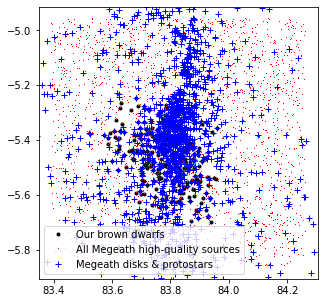

In [69]:
plt.figure(figsize=(5,5))
plt.plot(onc_match.approved['RAdeg'],  onc_match.approved['DEdeg'], 'k.', label="Our brown dwarfs")

plt.plot(megeath_all_truncated['RA'], megeath_all_truncated['Dec'], 'r,', label='All Megeath high-quality sources')

# plt.plot(megeath_all_truncated['RA'], megeath_all_truncated['Dec'], 'r,')
plt.draw()

plt.plot(ra.deg, dec.deg, 'b+', scalex=False, scaley=False, label='Megeath disks & protostars')
plt.legend()

In [103]:
# okay, now let's play with some matching.

idx, d2d, d3d = onc_approved_coords.match_to_catalog_sky(megeath_disk_coords)
idx_a, d2d_a, d3d_a = onc_approved_coords.match_to_catalog_sky(megeath_all_coords)


(array([ 1.,  5., 16., 18., 25., 22., 15., 14., 11.,  4.,  3.,  2.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

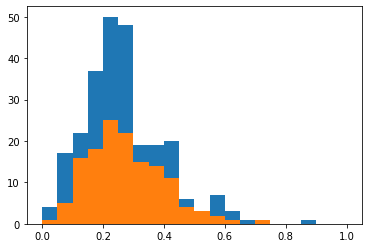

In [91]:
plt.subplots(1)
# plt.hist(d2d.to(u.arcsec).value, bins=50, range=(0,1), label='All NGC 1333 members')
# plt.hist(d2d.to(u.arcsec).value, range=(0, 1), bins=20)

plt.hist(d2d_a.to(u.arcsec).value, range=(0,1), bins=20)
plt.hist(d2d.to(u.arcsec).value, range=(0,1), bins=20)


In [111]:
idx[d2d<0.5*u.arcsec]

array([1670, 1597, 1620, 1620, 1647, 1612, 1660, 1685, 1622, 1584, 1682,
       1623, 1581, 1594, 1589, 1711, 1654, 1692, 1702, 1701, 1600, 1571,
       1531, 1538, 1529, 1648, 1603, 1550, 1560, 1617, 1569, 1659, 1615,
       1537, 1552, 1539, 1561, 1507, 1516, 1517, 1514, 1492, 1521, 1499,
       1544, 1553, 1510, 1493, 1495, 1489, 1480, 1505, 1501, 1466, 1459,
       1474, 1656, 1676, 1691, 1725, 1703, 1728, 1722, 1704, 1745, 1707,
       1772, 1650, 1650, 1739, 1695, 1860, 1829, 1818, 1750, 1796, 1810,
       1907, 1874, 1913, 1915, 1886, 1876, 2003, 1854, 1925, 1902, 1905,
       1896, 1945, 1859, 1845, 1950, 1953, 1939, 2025, 2009, 1995, 2085,
       2101, 1967, 2007, 1998, 1954, 2125, 2141, 2143, 2179, 2173, 2053,
       2083, 2120, 2156, 2204, 1409, 1425, 1479, 1455, 1421, 1383, 1411,
       1392, 1366, 1365, 1384, 1346, 1341, 1321, 1363, 1306, 1313])

In [120]:
max_sep = 0.5 * u.arcsec
sep_constraint = d2d < max_sep
sep_constraint_a = d2d_a < max_sep

# MD: Megeath Disks
matched_md = onc_match.approved[sep_constraint]
matches_md = megeath_disks.iloc[idx[sep_constraint]]
# matched_md = megeath_disks[sep_constraint]



In [175]:
idx[sep_constraint]

array([1670, 1597, 1620, 1620, 1647, 1612, 1660, 1685, 1622, 1584, 1682,
       1623, 1581, 1594, 1589, 1711, 1654, 1692, 1702, 1701, 1600, 1571,
       1531, 1538, 1529, 1648, 1603, 1550, 1560, 1617, 1569, 1659, 1615,
       1537, 1552, 1539, 1561, 1507, 1516, 1517, 1514, 1492, 1521, 1499,
       1544, 1553, 1510, 1493, 1495, 1489, 1480, 1505, 1501, 1466, 1459,
       1474, 1656, 1676, 1691, 1725, 1703, 1728, 1722, 1704, 1745, 1707,
       1772, 1650, 1650, 1739, 1695, 1860, 1829, 1818, 1750, 1796, 1810,
       1907, 1874, 1913, 1915, 1886, 1876, 2003, 1854, 1925, 1902, 1905,
       1896, 1945, 1859, 1845, 1950, 1953, 1939, 2025, 2009, 1995, 2085,
       2101, 1967, 2007, 1998, 1954, 2125, 2141, 2143, 2179, 2173, 2053,
       2083, 2120, 2156, 2204, 1409, 1425, 1479, 1455, 1421, 1383, 1411,
       1392, 1366, 1365, 1384, 1346, 1341, 1321, 1363, 1306, 1313])

In [131]:
# MA: Megeath All (disks + non)
matched_ma = onc_match.approved[sep_constraint_a]
matches_ma = megeath_all_truncated.iloc[idx_a[sep_constraint]]

# MN: Megeath Nondisks
matched_mn = onc_match.approved[sep_constraint_a & ~sep_constraint]

In [135]:
len(matched_ma), len(matched_md), len(matched_mn), len(onc_match.approved), 336-242

(242, 131, 111, 336, 94)

(array([130.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

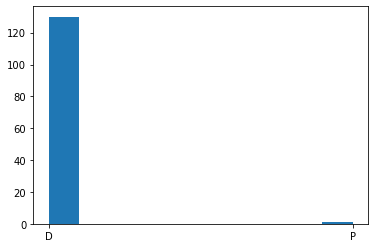

In [125]:
plt.hist(matches_md['Class'])

In [180]:
megeath_class = np.array(['--']*len(onc_match.approved))
for i in range(len(megeath_class)):
    print(i, onc_match.approved[i]['SOURCEID'])
    if sep_constraint[i]:
#         print("I'm a disk or protostar")

        # check what this one's index in `matches_md` would be.
        

        print(megeath_disks['Num'][idx[sep_constraint][i]])
        print(matches_md.loc[megeath_disks['Num'][idx[sep_constraint][i]]]['Class'])
        
#         print(matches_md[i]['Class'])
#         print(matched_md[i]['SOURCEID'])
        
        
    elif sep_constraint_a[i]:
        print("I'm definitely not disked!")
    else:
        print("My status is unknown.")
    print("")

0 44199508515375
1671
D

1 44199508515199
I'm definitely not disked!

2 44199508515224
I'm definitely not disked!

3 44199508475055
1621
Class
-----
    D
    D

4 44199508514291
I'm definitely not disked!

5 44199508514565
1613
D

6 44199508514565
1661
D

7 44199508514290
My status is unknown.

8 44199508515004
1623
D

9 44199508514784
I'm definitely not disked!

10 44199508514777
I'm definitely not disked!

11 44199508513375
I'm definitely not disked!

12 44199508513734
1582
D

13 44199508513736
I'm definitely not disked!

14 44199508513807
1590
D

15 44199508513812
I'm definitely not disked!

16 44199508513339
My status is unknown.

17 44199508513934
1693
D

18 44199508513943
1703
D

19 44199508513864
I'm definitely not disked!

20 44199508513711
1601
D

21 44199508513687
1572
D

22 44199508512695
I'm definitely not disked!

23 44199508512696
I'm definitely not disked!

24 44199508512410
1530
D

25 44199508512516
1649
D

26 44199508512929
My status is unknown.

27 44199508513202
I'm

IndexError: index 135 is out of bounds for axis 0 with size 131

In [184]:
matches_md.loc[1621]

Num,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,3.6mag,e_3.6mag,4.5mag,e_4.5mag,5.8mag,e_5.8mag,8.0mag,e_8.0mag,24mag,e_24mag,AK,alpha,Class
,h,min,s,,deg,arcmin,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,
int64,int64,int64,float64,str1,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2
1621,5,34,40.82,-,5,28,9.4,12.6,0.03,11.92,0.03,11.59,0.02,10.96,0.01,10.56,0.01,10.07,0.01,9.37,0.01,--,--,0.0,-0.99,D
1621,5,34,40.82,-,5,28,9.4,12.6,0.03,11.92,0.03,11.59,0.02,10.96,0.01,10.56,0.01,10.07,0.01,9.37,0.01,--,--,0.0,-0.99,D


In [193]:
megeath_class = np.array(['--']*len(onc_match.approved))
for i in range(len(megeath_class)):
    print(i)
    if sep_constraint[i]:
        # NOT CORRECT but misses exactly one protostar.
        megeath_class[i] = "D"
#         try:
#             megeath_class[i] = matches_md.loc[megeath_disks['Num'][idx[sep_constraint][i]]]['Class']
#         # edge case with I think two matches to the same Megeath target
#         except ValueError:
#             megeath_class[i] = matches_md.loc[megeath_disks['Num'][idx[sep_constraint][i]]]['Class'][0]
    elif sep_constraint_a[i]:
        megeath_class[i] = "ND"
    else:
        megeath_class[i] = "na"
        
print(megeath_class)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

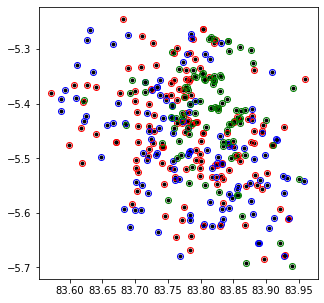

In [200]:
plt.figure(figsize=(5,5))
plt.plot(onc_match.approved['RAdeg'],  onc_match.approved['DEdeg'], 'k.', label="Our brown dwarfs")

disks = megeath_class == 'D'
nondisks = megeath_class == 'ND'
unknowns = megeath_class == 'na'

plt.plot(onc_match.approved['RAdeg'][disks],  onc_match.approved['DEdeg'][disks], 'ro', markerfacecolor='None', label="Our brown dwarfs")
plt.plot(onc_match.approved['RAdeg'][nondisks],  onc_match.approved['DEdeg'][nondisks], 'bo', markerfacecolor='None', label="Our brown dwarfs")
plt.plot(onc_match.approved['RAdeg'][unknowns],  onc_match.approved['DEdeg'][unknowns], 'go', markerfacecolor='None', label="Our brown dwarfs")

# plt.plot(megeath_all_truncated['RA'], megeath_all_truncated['Dec'], 'r,', label='All Megeath high-quality sources')

# # plt.plot(megeath_all_truncated['RA'], megeath_all_truncated['Dec'], 'r,')
# plt.draw()

# plt.plot(ra.deg, dec.deg, 'b+', scalex=False, scaley=False, label='Megeath disks & protostars')
# plt.legend()

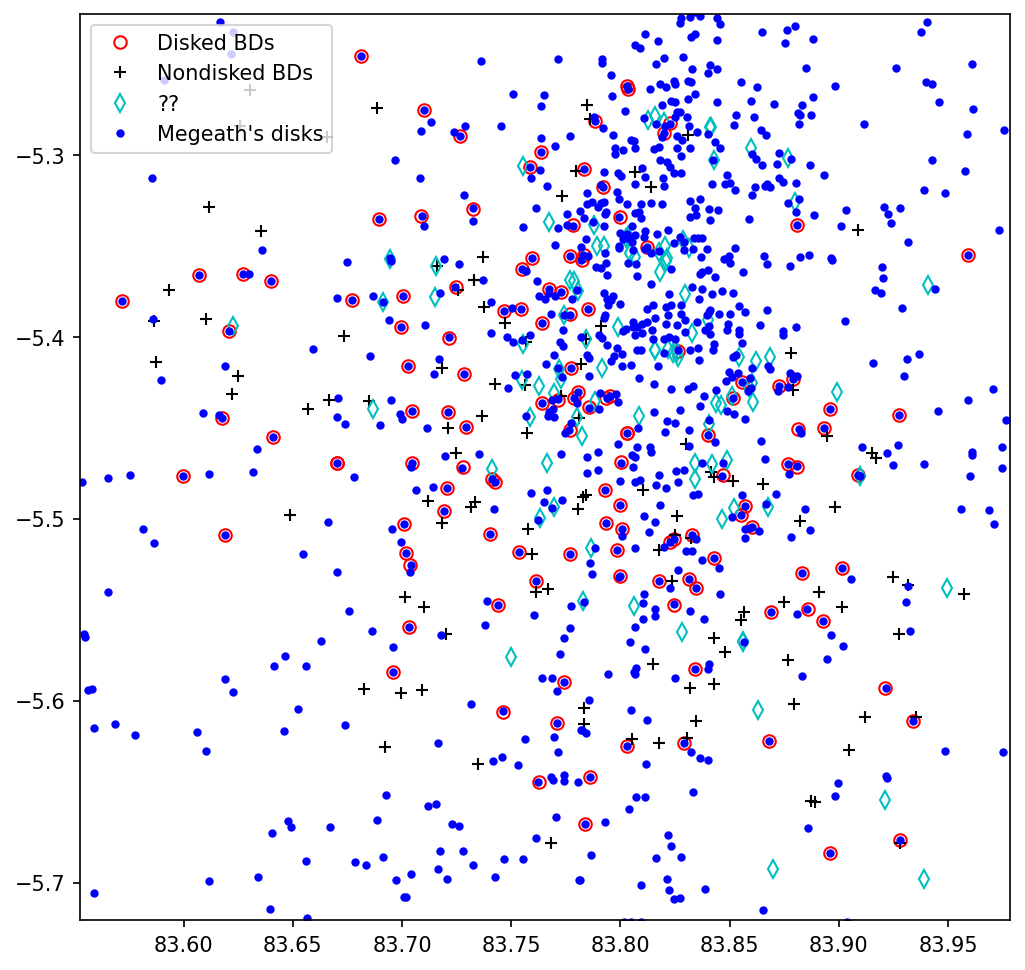

In [207]:
plt.figure(figsize=(8,8), dpi=150)

plt.plot(onc_match.approved['RAdeg'][disks],  onc_match.approved['DEdeg'][disks], 'ro', markerfacecolor='None', label="Disked BDs")

plt.plot(onc_match.approved['RAdeg'][nondisks],  onc_match.approved['DEdeg'][nondisks], 'k+', label="Nondisked BDs")
plt.plot(onc_match.approved['RAdeg'][unknowns],  onc_match.approved['DEdeg'][unknowns], 'cd', mfc='None', label="??")


plt.draw()
plt.plot(megeath_disk_coords.ra.deg,  megeath_disk_coords.dec.deg, 'b.', label="Megeath's disks", scalex=False, scaley=False)

plt.legend()

In [230]:


%run ../prototype2_of_variability_full_criteria.py

WSERV5:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 330 (Stat: 211)
v2: 81 (81)
v1: 86 (84)
v_per: 78 (54)
v_subj: 16 (2)
138 330
v_total: 138 (100)
Statistical variability rate: 100/211 = 0.47
Statistical periodicity rate: 54/211 = 0.26

Disks: 129 (Stat: 100)
Non-disks: 110 (Stat: 87)
Variable Disks: 79 (Stat: 66)
Variable Non-disks: 35 (Stat: 27)
Statistical DISKED variability rate: 66/100 = 0.66
Statistical DISKED periodicity rate: 29/100 = 0.29
Statistical NONDISKED variability rate: 27/87 = 0.31
Statistical NONDISKED periodicity rate: 19/87 = 0.22


WSERV7:
Ref: 103 (Stat: 69)
v2: 29 (29)
v1: 31 (30)
v_per: 29 (24)
v_subj: 6 (0)
47 103
v_total: 47 (36)
Statistical variability rate: 36/69 = 0.52
Statistical periodicity rate: 24/69 = 0.35

Disks: 56 (Stat: 43)
Non-disks: 42 (Stat: 26)
Variable Disks: 38 (Stat: 30)
Variable Non-disks: 8 (Stat: 6)
Statistical DISKED variability rate: 30/43 = 0.70
Statistical DISKED periodicity rate: 18/43 = 0.42
Statistical NONDISKED variability rate: 6/26 = 0.23
Statistical NONDISKED periodicity

In [222]:
onc_match.approved

SOURCEID,median_MEANMJDOBS,median_RA,median_DEC,median_JMHPNT,median_JMHPNTERR,median_HMKPNT,median_HMKPNTERR,median_JAPERMAG3,median_JAPERMAG3ERR,median_HAPERMAG3,median_HAPERMAG3ERR,median_KAPERMAG3,median_KAPERMAG3ERR,median_JPPERRBITS,median_HPPERRBITS,median_KPPERRBITS,median_MERGEDCLASS,median_PSTAR,median_JGRADE,median_HGRADE,median_KGRADE,var_J_red_chisq,var_H_red_chisq,var_K_red_chisq,var_Stetson_HK,var_Stetson_JK,var_Stetson_JH,var_Stetson_JHK,std_MEANMJDOBS,std_RA,std_DEC,std_JMHPNT,std_JMHPNTERR,std_HMKPNT,std_HMKPNTERR,std_JAPERMAG3,std_JAPERMAG3ERR,std_HAPERMAG3,std_HAPERMAG3ERR,std_KAPERMAG3,std_KAPERMAG3ERR,std_JPPERRBITS,std_HPPERRBITS,std_KPPERRBITS,std_MERGEDCLASS,std_PSTAR,std_JGRADE,std_HGRADE,std_KGRADE,range_MEANMJDOBS,range_RA,range_DEC,range_JMHPNT,range_JMHPNTERR,range_HMKPNT,range_HMKPNTERR,range_JAPERMAG3,range_JAPERMAG3ERR,range_HAPERMAG3,range_HAPERMAG3ERR,range_KAPERMAG3,range_KAPERMAG3ERR,range_JPPERRBITS,range_HPPERRBITS,range_KPPERRBITS,range_MERGEDCLASS,range_PSTAR,range_JGRADE,range_HGRADE,range_KGRADE,index,RAdeg,DEdeg,Xpix,Ypix,l_mag130,mag130,e_mag130,l_mag139,mag139,e_mag139,color,e_color,Ndet,log(BF),Mstar,Teff,Av,SpT
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,pix,pix,,mag,mag,,mag,mag,mag,mag,,dex(---),Msun,K,mag,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64
44199508515375,54127.830701700004,1.4594020620883397,-0.09502202362236571,0.6431174278259277,0.021297559142112732,0.36696624755859375,0.021219439804553986,13.512184143066406,0.010452834889292717,12.871636390686035,0.01027637254446745,12.502649307250977,0.010324781760573387,16.0,16.0,16.0,-1.0,0.9996572136878967,0.9578189849853516,0.9713993668556213,0.9709172248840332,1.5325661592705304,1.7294769287109375,1.3095932492784634,0.5139585045295033,0.3615432519179124,0.5869193443885217,1.2563500219537307,237.41753848049956,1.5117603777843054e-07,1.618394488306759e-07,0.012734085321426392,5.443862028187141e-05,0.010652006603777409,2.940889862657059e-05,0.012936217710375786,8.076905942289159e-05,0.013477504253387451,3.34317228407599e-05,0.011787650175392628,3.3606334909563884e-05,5.772819396705759,4.703380691654247,1.2688571226472574,0.0,0.022058866918087006,0.33236148953437805,0.12295123189687729,0.12467862665653229,720.0802113099926,3.559925461082969e-07,3.685470071901342e-07,0.029025363922119074,0.0001171739771962145,0.026314544677734364,6.136260926723619e-05,0.031386566162108664,0.00016275430098175968,0.035385704040528765,7.940772920846974e-05,0.029849147796630504,7.772706449031726e-05,16.0,0.0,0.0,0.0,0.005792200565338135,0.9967287957668305,0.12870559096336376,0.13985686302185063,5,83.61754,-5.444363,10360.07,8324.79,--,13.38,0.01,--,13.43,0.02,-0.05,0.02,2,2.0,0.14,3084,1.72,5.303703703703704
44199508515199,54127.83016,1.4595317306516624,-0.09462284334364499,0.6015186309814453,0.021253785118460655,0.30809593200683594,0.021206393837928772,13.343151092529297,0.010399295017123222,12.743422508239746,0.010253977961838245,12.434407234191895,0.0103176673874259,0.0,0.0,0.0,-1.0,0.9996572136878967,0.9565820693969727,0.9661210775375366,0.9652907252311707,1.1549243633563702,1.314333234514509,1.1769988601272172,0.6341171264648438,0.3885193590847951,0.47921330321068856,1.2516551646151284,237.41124447942315,5.997431405050953e-08,4.24756890043649e-08,0.009485664777

In [223]:
# augment_oncvar_approved_with_disk_column(onc_match)

augment_oncmatch_with_disk_column(onc_match, "approved")

In [225]:
wserv=5

disks = select_disks(wserv)
nondisks = select_disks(wserv, choice="no")


In [209]:
stat = select_targets(5,attr='statistical') 
# disks = select_disks(7, attr='statistical')
# nondisks = select_disks(7, attr='statistical', choice='no')
# np.sum(stat), np.sum(disks), np.sum(nondisks)

In [19]:
def make_megeath_class_column():
    """
    Generates a Class column from the Megeath data.

    For Disks and Protostars, the Class comes straight from
    megeath2012_by_ukvar. But there are two other classes:
    'ND' (no disk) which are sources in Megeath_allgoodsources_by_ukvar
    that are NOT in megeath2012_by_ukvar; and 'na' (blank),
    which are the 'orphans' and Megeath-matches-with-poor-Spitzer-photometry.

    """

    megeath_class_column = np.copy(megeath2012_by_ukvar.Class)

    for i in range(len(megeath_class_column)):
        if (megeath_class_column[i] == 'na' and
            megeath2012_all_by_ukvar.IDL_index[i] > 0) :
            megeath_class_column[i] = 'ND'

    return megeath_class_column

In [20]:
# I want something like this...
disky = ngc_match.approved['IRexc']=='yes'

# that I can use in a context like this...
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][per], 
#         x_match.approved['range_KAPERMAG3'][per], 
        period_table_per['Amp']*2,
        s=10, 
        linewidths=0.25,
        c='k',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_stat['Amp']*2,
        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='periodic, statistical'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Periodic variability amplitude (mag, peak-to-peak)")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_ylim(0, 0.2)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV5:


NameError: name 'select_targets' is not defined

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator


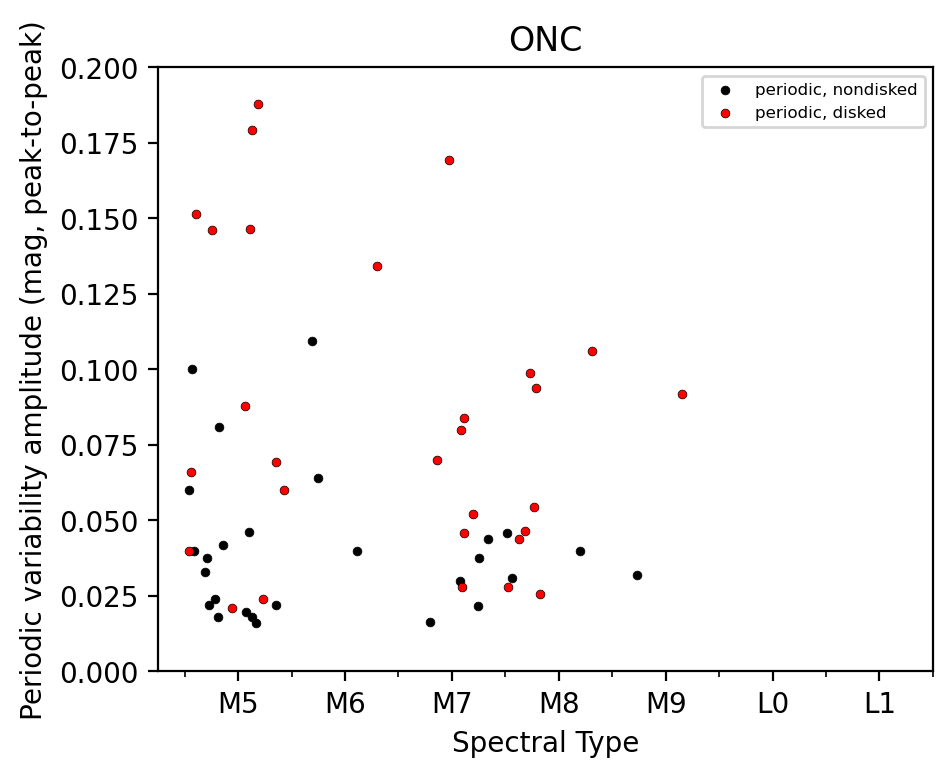

In [233]:
# for wserv in [5, 7, 8]:
for wserv in [5]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    

    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')
    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    per_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & disks])
    per_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & nondisks])
    
    per_stat_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & disks])
    per_stat_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & nondisks])
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    period_table_per_stat_disk = period_table.loc[x_match.approved['SOURCEID'][per_stat_disks]]
    period_table_per_stat_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_stat_nondisks]]

    period_table_per_disk = period_table.loc[x_match.approved['SOURCEID'][per_disks]]
    period_table_per_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_nondisks]]
    
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

#     ax.scatter(
#         x_match.approved['SpT'][per], 
# #         x_match.approved['range_KAPERMAG3'][per], 
#         period_table_per['Amp']*2,
#         s=10, 
#         linewidths=0.25,
#         c='k',
#         ec='k',
#         label='periodic, not statistical'
#     )
#     ax.scatter(
#         x_match.approved['SpT'][per_stat], 
# #         x_match.approved['range_KAPERMAG3'][per_stat], 
#         period_table_per_stat['Amp']*2,
#         s=10, 
#         linewidths=0.25,
#         c='C0',
#         ec='k',
#         label='periodic, statistical'
#     )

    ax.scatter(
        x_match.approved['SpT'][per_nondisks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_nondisk['Amp']*2,
        s=10, 
        linewidths=0.25,
        c='k',
        ec='k',
        label='periodic, nondisked'
    )    
    
    
    ax.scatter(
        x_match.approved['SpT'][per_disks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_disk['Amp']*2,
        s=10, 
        linewidths=0.25,
        c='r',
        ec='k',
        label='periodic, disked'
    )

#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Periodic variability amplitude (mag, peak-to-peak)")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_ylim(0, 0.2)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator


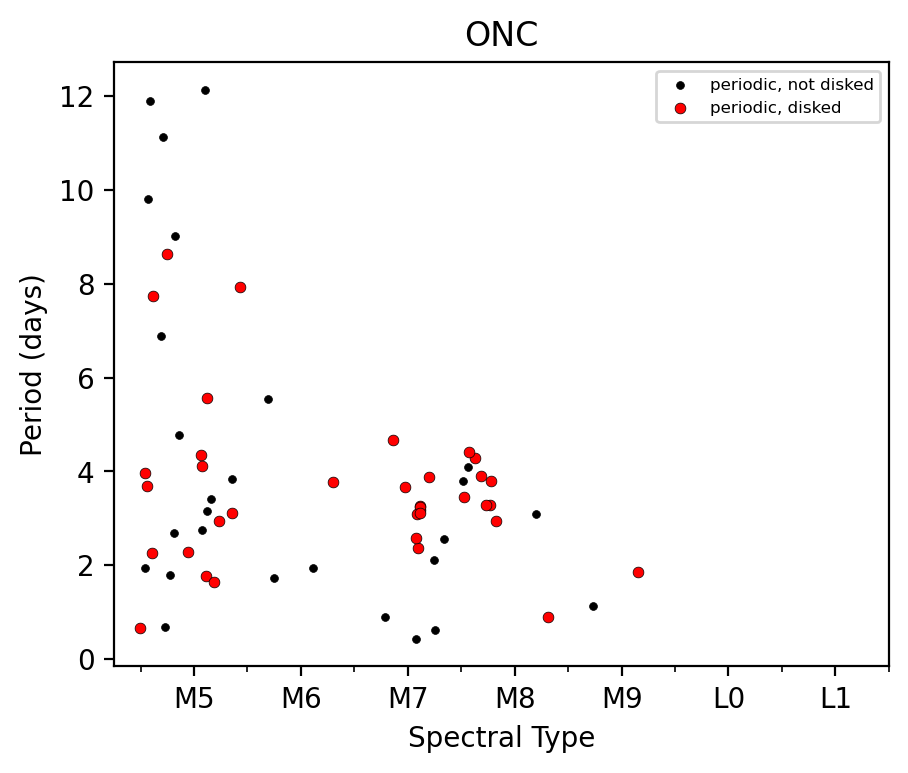

In [234]:
for wserv in [5]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')
    
    
    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    per_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & disks])
    per_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & nondisks])
    
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]

    period_table_per_disk = period_table.loc[x_match.approved['SOURCEID'][per_disks]]
    period_table_per_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_nondisks]]
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][per_nondisks], 
#         x_match.approved['range_KAPERMAG3'][per], 
        period_table_per_nondisk['Period'],
        s=8, 
        linewidths=0.25,
        marker='o',
        c='k',
        ec='k',
        label='periodic, not disked'
    )
    ax.scatter(
        x_match.approved['SpT'][per_disks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_disk['Period'],
        s=15, 
        linewidths=0.25,
        c='r',
        ec='k',
        label='periodic, disked'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Period (days)")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
disked: 129
nondisked: 110
138 330


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator


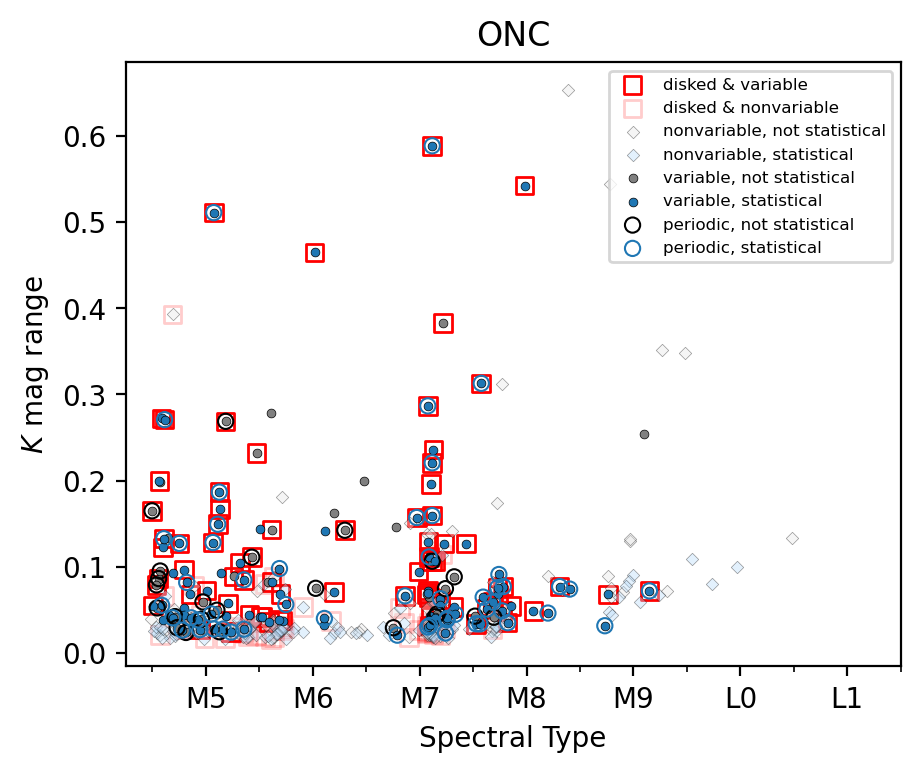

In [235]:
for wserv in [5]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)
    
    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')    

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")
    print(f"disked: {np.sum(ref & disks)}")
    print(f"nondisked: {np.sum(ref & nondisks)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    disked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & disks])
    nondisked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & nondisks])
    

    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][disked & (var|var_stat)], 
        x_match.approved['range_KAPERMAG3'][disked & (var|var_stat)], 
        marker='s',
        s=40, 
        linewidths=1,
        c='None',
        ec='r',
        label='disked & variable',
#         alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][disked & ~(var|var_stat)], 
        x_match.approved['range_KAPERMAG3'][disked & ~(var|var_stat)], 
        marker='s',
        s=40, 
        linewidths=1,
        c='None',
        ec='r',
        label='disked & nonvariable',
        alpha=0.2,
    )

    ax.scatter(
        x_match.approved['SpT'][nonvar], 
        x_match.approved['range_KAPERMAG3'][nonvar], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='0.9',
        ec='k',
        label='nonvariable, not statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][nonvar_stat], 
        x_match.approved['range_KAPERMAG3'][nonvar_stat], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='#bbdefb',
        ec='k',
        label='nonvariable, statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][var], 
        x_match.approved['range_KAPERMAG3'][var], 
        s=10, 
        linewidths=0.25,
        c='0.5',
        ec='k',
        label='variable, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][var_stat], 
        x_match.approved['range_KAPERMAG3'][var_stat], 

        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='variable, statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per], 
        x_match.approved['range_KAPERMAG3'][per], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
        x_match.approved['range_KAPERMAG3'][per_stat], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='C0',
        label='periodic, statistical'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("$K$ mag range")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6, loc='upper right')
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
disked: 129
nondisked: 110
138 330


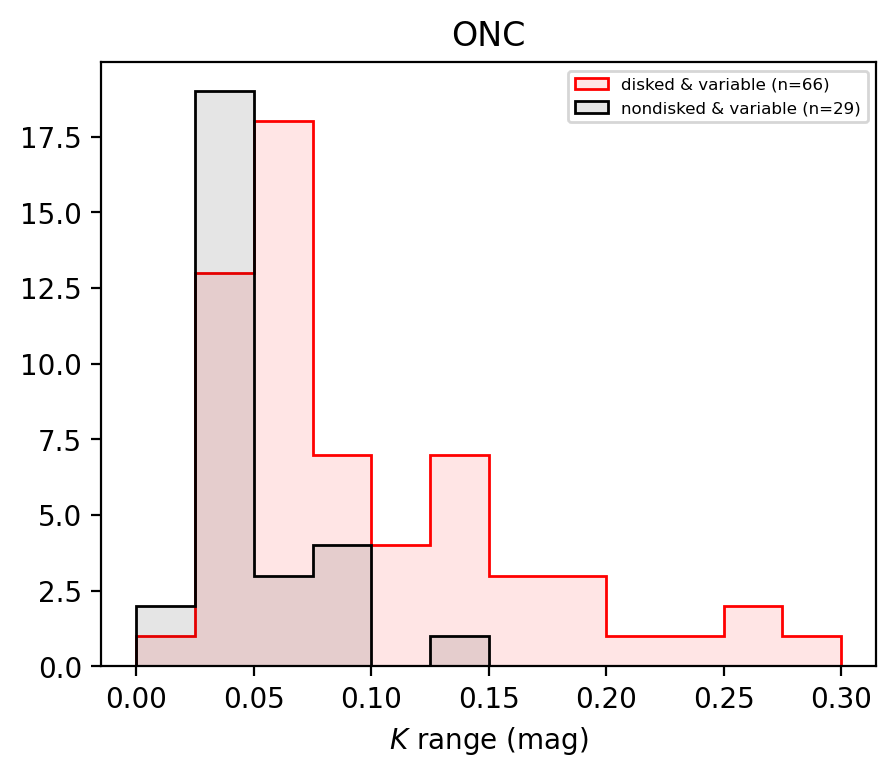

In [236]:
# Ok, we want to make a pair of histograms. On the same figure.

# Histogram #1  (black, I think): variability amplitudes of non-disked statistical objects in each field. 
# No differentiation by spectral type.

for wserv in [5]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)
    
    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')    

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")
    print(f"disked: {np.sum(ref & disks)}")
    print(f"nondisked: {np.sum(ref & nondisks)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    disked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & disks])
    nondisked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & nondisks])
    
    n_disked_and_variable = np.sum(disked & (var_stat))
    n_nondisked_and_variable = np.sum(nondisked & (var_stat))
    
        
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)
    
    histrange = [0, 0.3]
    n_bins = 12


    ax.hist(
        x_match.approved['range_KAPERMAG3'][disked & (var_stat)], 
        range=histrange,
        bins=n_bins,
#         color='r',
        histtype='stepfilled',
        ec='r',
        fc=(1, 0, 0, 0.1),
        label=f'disked & variable (n={n_disked_and_variable})',
        
    )
    ax.hist(
        x_match.approved['range_KAPERMAG3'][nondisked & (var_stat)], 
        range=histrange,
        bins=n_bins,
        color='k',
        histtype='stepfilled',
        ec='k',
        fc=(0,0,0, 0.1),
        label=f'nondisked & variable (n={n_nondisked_and_variable})',
    )

    
#     ax.invert_yaxis()

#     ax.set_xlim(4.25, 11.5)
#     ax.set_xlabel("Spectral Type")
    ax.set_xlabel("$K$ range (mag)")

#     xticks = ax.get_xticks()
#     xticks_minor = np.arange(4.5, 12, 0.5)
#     ax.set_xticks(xticks_minor, minor=True)
#     new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
#     ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6, loc='upper right')
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV5:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330


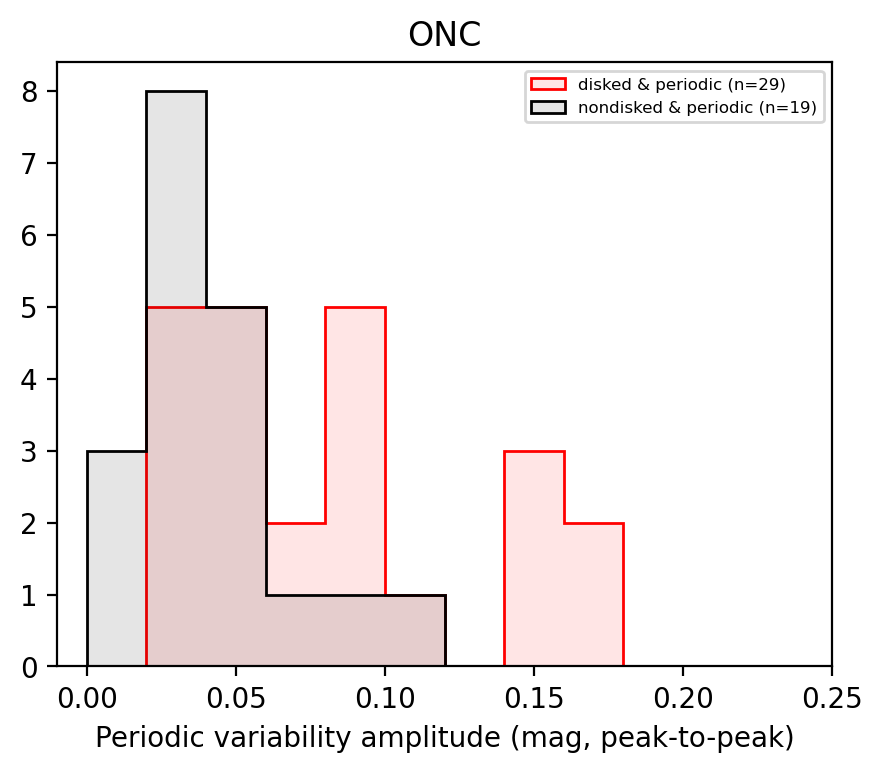

In [237]:
# for wserv in [5, 7, 8]:
for wserv in [5]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    

    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')
    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    per_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & disks])
    per_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & nondisks])
    
    per_stat_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & disks])
    per_stat_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & nondisks])
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    period_table_per_stat_disk = period_table.loc[x_match.approved['SOURCEID'][per_stat_disks]]
    period_table_per_stat_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_stat_nondisks]]

    period_table_per_disk = period_table.loc[x_match.approved['SOURCEID'][per_disks]]
    period_table_per_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_nondisks]]

    
    n_disked_and_variable = np.sum(per_stat_disks)
    n_nondisked_and_variable = np.sum(per_stat_nondisks)
    
    histrange = [0, 0.2]
    n_bins = 10
    
    
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)


    
    
    ax.hist(
#         x_match.approved['SpT'][per_disks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_stat_disk['Amp']*2,
#         s=10, 
#         linewidths=0.25,
        range=histrange,
        bins=n_bins,
#         color='r',
        histtype='stepfilled',
        ec='r',
        fc=(1, 0, 0, 0.1),
#         ec='k',
        label=f'disked & periodic (n={n_disked_and_variable})',
    )

    ax.hist(
        
#         x_match.approved['SpT'][per_nondisks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_stat_nondisk['Amp']*2,
        range=histrange,
        bins=n_bins,
        color='k',
        histtype='stepfilled',
        ec='k',
        fc=(0,0,0, 0.1),        
        label=f'nondisked & periodic (n={n_nondisked_and_variable})',
    )    
#     ax.invert_yaxis()

#     ax.set_xlim(4.25, 11.5)
#     ax.set_xlabel("Spectral Type")
    ax.set_xlabel("Periodic variability amplitude (mag, peak-to-peak)")

#     xticks = ax.get_xticks()
#     xticks_minor = np.arange(4.5, 12, 0.5)
#     ax.set_xticks(xticks_minor, minor=True)
#     new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
#     ax.set_xticklabels(new_xtick_labels)
    
    ax.set_xlim(None, 0.25)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV5:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
disked: 129
nondisked: 110
138 330
WSERV7:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
disked: 56
nondisked: 42
47 103
WSERV8:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
disked: 92
nondisked: 122
59 225


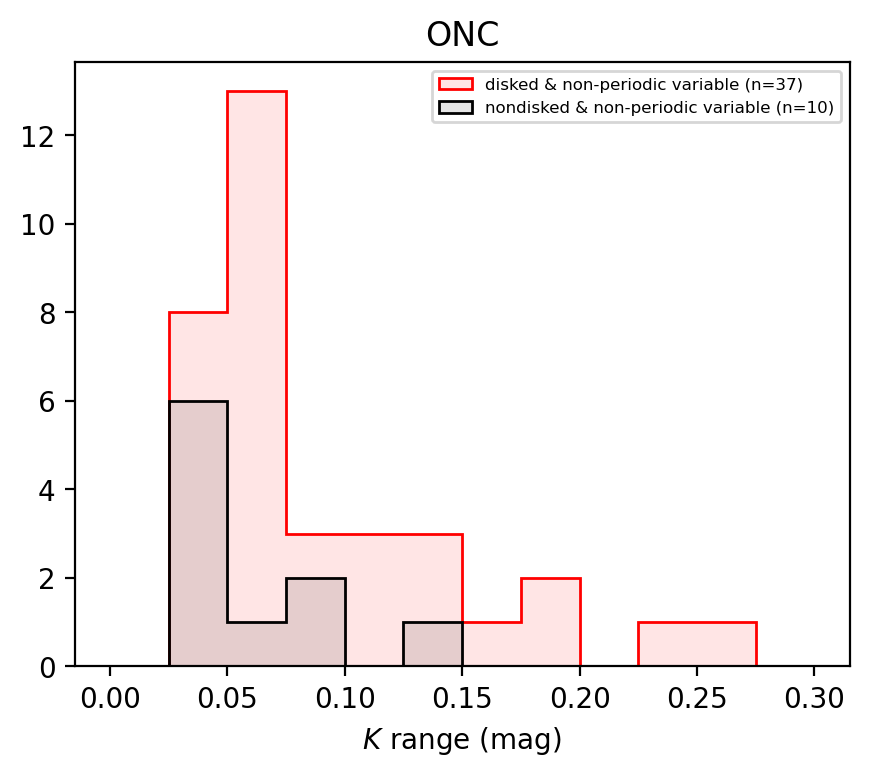

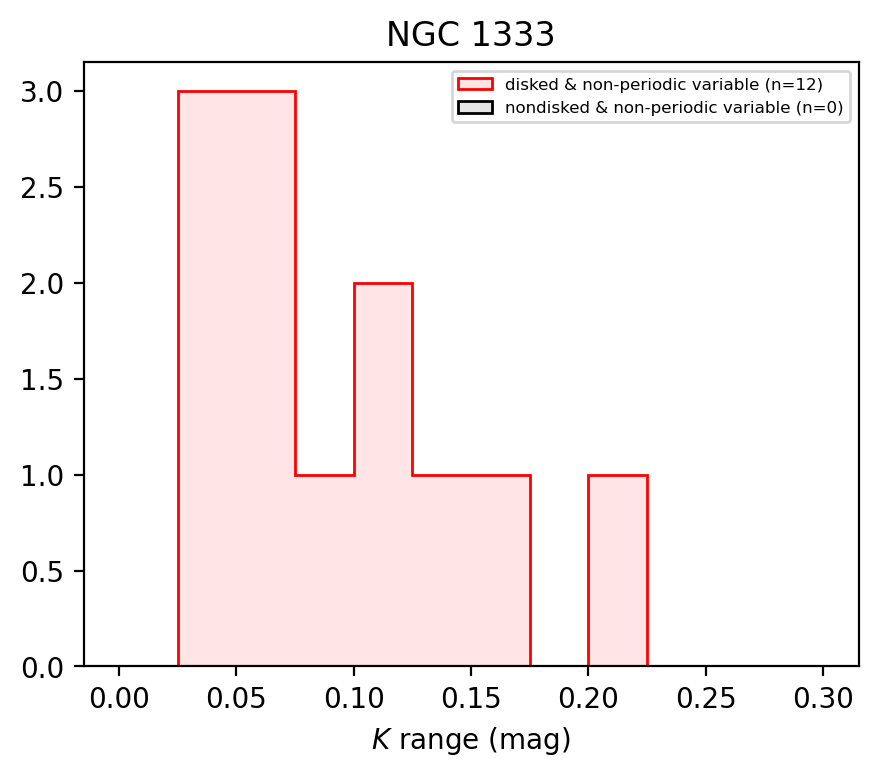

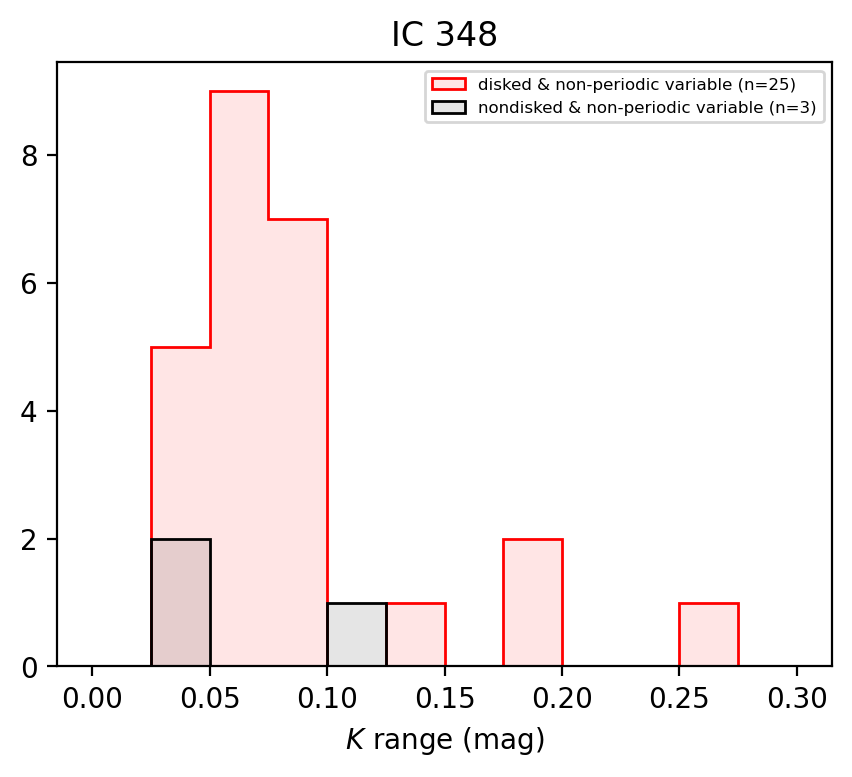

In [248]:
# non periodic histograms

# Ok, we want to make a pair of histograms. On the same figure.

# Histogram #1  (black, I think): variability amplitudes of non-disked statistical objects in each field. 
# No differentiation by spectral type.

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)
    
    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')    

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")
    print(f"disked: {np.sum(ref & disks)}")
    print(f"nondisked: {np.sum(ref & nondisks)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])

    per_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & disks])
    per_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & nondisks])
    
    per_stat_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & disks])
    per_stat_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & nondisks])
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    period_table_per_stat_disk = period_table.loc[x_match.approved['SOURCEID'][per_stat_disks]]
    period_table_per_stat_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_stat_nondisks]]

    period_table_per_disk = period_table.loc[x_match.approved['SOURCEID'][per_disks]]
    period_table_per_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_nondisks]]

    
    n_disked_and_variable = np.sum(per_stat_disks)
    n_nondisked_and_variable = np.sum(per_stat_nondisks)    
    
    disked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & disks])
    nondisked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & nondisks])
    
    n_disked_and_variable_nonper = np.sum(disked & (var_stat) & ~(per | per_stat))
    n_nondisked_and_variable_nonper = np.sum(nondisked & (var_stat) & ~(per | per_stat))
    
        
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)
    
    histrange = [0, 0.3]
    n_bins = 12


    ax.hist(
        x_match.approved['range_KAPERMAG3'][disked & (var_stat) & ~(per | per_stat)], 
        range=histrange,
        bins=n_bins,
#         color='r',
        histtype='stepfilled',
        ec='r',
        fc=(1, 0, 0, 0.1),
        label=f'disked & non-periodic variable (n={n_disked_and_variable_nonper})',
        
    )
    ax.hist(
        x_match.approved['range_KAPERMAG3'][nondisked & (var_stat) & ~(per | per_stat)], 
        range=histrange,
        bins=n_bins,
        color='k',
        histtype='stepfilled',
        ec='k',
        fc=(0,0,0, 0.1),
        label=f'nondisked & non-periodic variable (n={n_nondisked_and_variable_nonper})',
    )

    
    ax.set_xlabel("$K$ range (mag)")

    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6, loc='upper right')
    


WSERV5:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


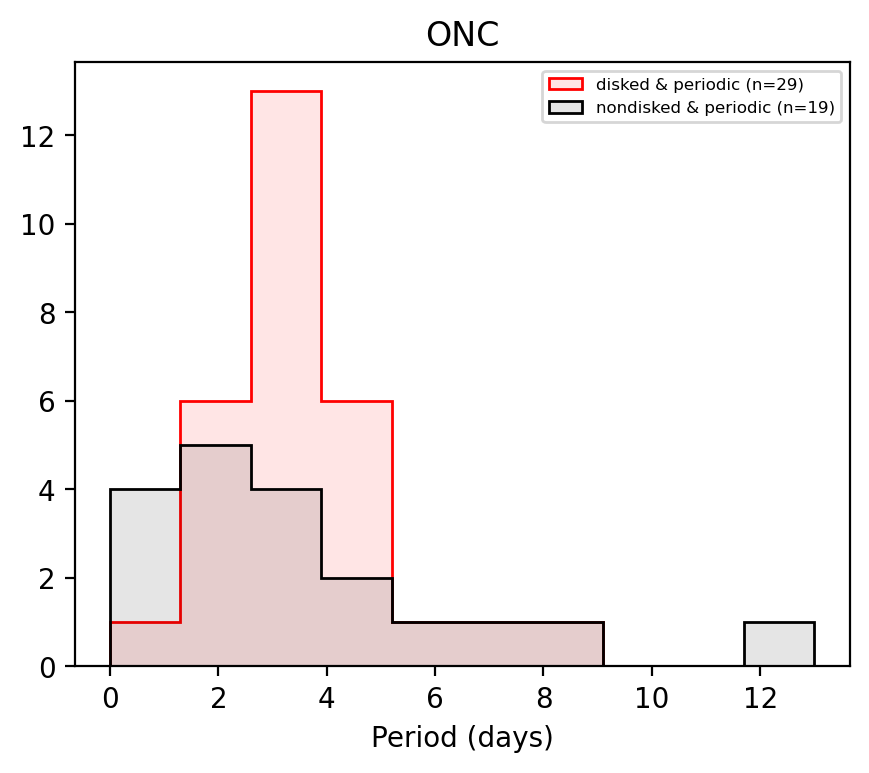

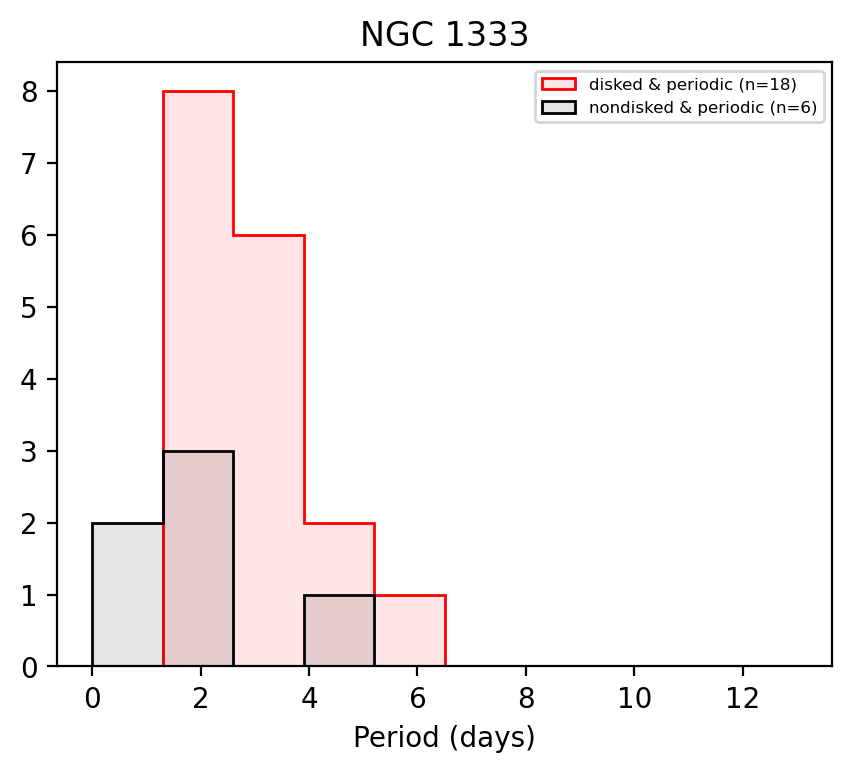

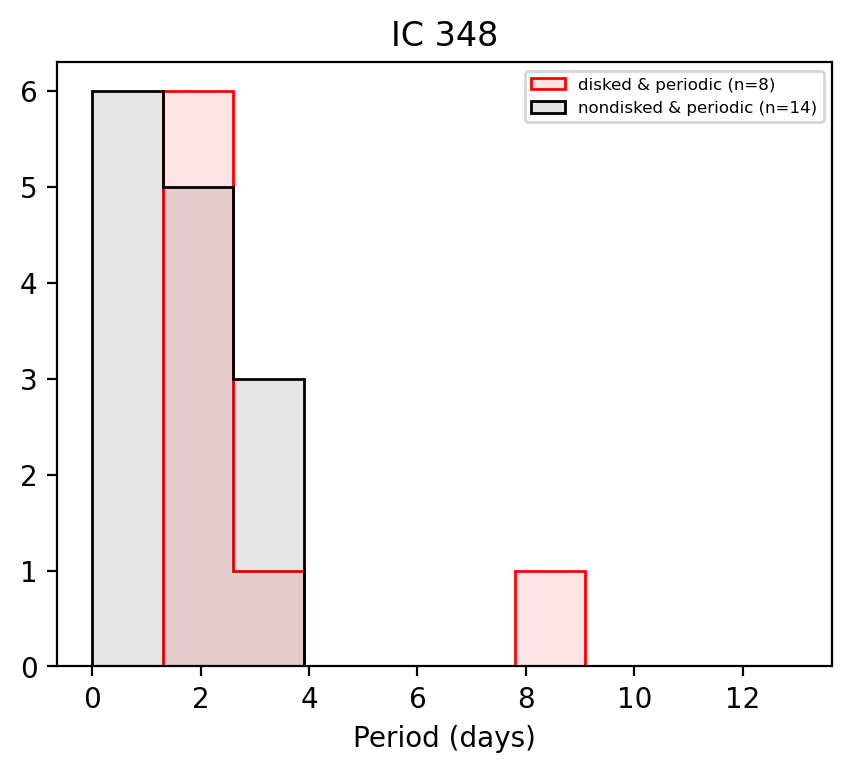

In [245]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')
    
    
    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    per_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & disks])
    per_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & nondisks])
    per_stat_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & disks])
    per_stat_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & nondisks])    
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]

    period_table_per_disk = period_table.loc[x_match.approved['SOURCEID'][per_disks]]
    period_table_per_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_nondisks]]

    period_table_per_stat_disk = period_table.loc[x_match.approved['SOURCEID'][per_stat_disks]]
    period_table_per_stat_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_stat_nondisks]] 
    
    n_disked_and_variable = np.sum(per_stat_disks)
    n_nondisked_and_variable = np.sum(per_stat_nondisks)    
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    histrange = [0, 13]
    n_bins = 10    
    
    ax.hist(
#         x_match.approved['SpT'][per_disks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_stat_disk['Period'],
#         s=10, 
#         linewidths=0.25,
        range=histrange,
        bins=n_bins,
#         color='r',
        histtype='stepfilled',
        ec='r',
        fc=(1, 0, 0, 0.1),
#         ec='k',
        label=f'disked & periodic (n={n_disked_and_variable})',
    )

    ax.hist(
        
#         x_match.approved['SpT'][per_nondisks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_stat_nondisk['Period'],
        range=histrange,
        bins=n_bins,
        color='k',
        histtype='stepfilled',
        ec='k',
        fc=(0,0,0, 0.1),        
        label=f'nondisked & periodic (n={n_nondisked_and_variable})',
    )        
    
#     ax.scatter(
#         x_match.approved['SpT'][per_nondisks], 
# #         x_match.approved['range_KAPERMAG3'][per], 
#         period_table_per_nondisk['Period'],
#         s=8, 
#         linewidths=0.25,
#         marker='o',
#         c='k',
#         ec='k',
#         label='periodic, not disked'
#     )
#     ax.scatter(
#         x_match.approved['SpT'][per_disks], 
# #         x_match.approved['range_KAPERMAG3'][per_stat], 
#         period_table_per_disk['Period'],
#         s=15, 
#         linewidths=0.25,
#         c='r',
#         ec='k',
#         label='periodic, disked'
#     )
    
#     ax.invert_yaxis()

#     ax.set_xlim(4.25, 11.5)
#     ax.set_xlabel("Spectral Type")
    ax.set_xlabel("Period (days)")
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV5:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
disked: 129
nondisked: 110
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
disked: 56
nondisked: 42
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
disked: 92
nondisked: 122
59 225


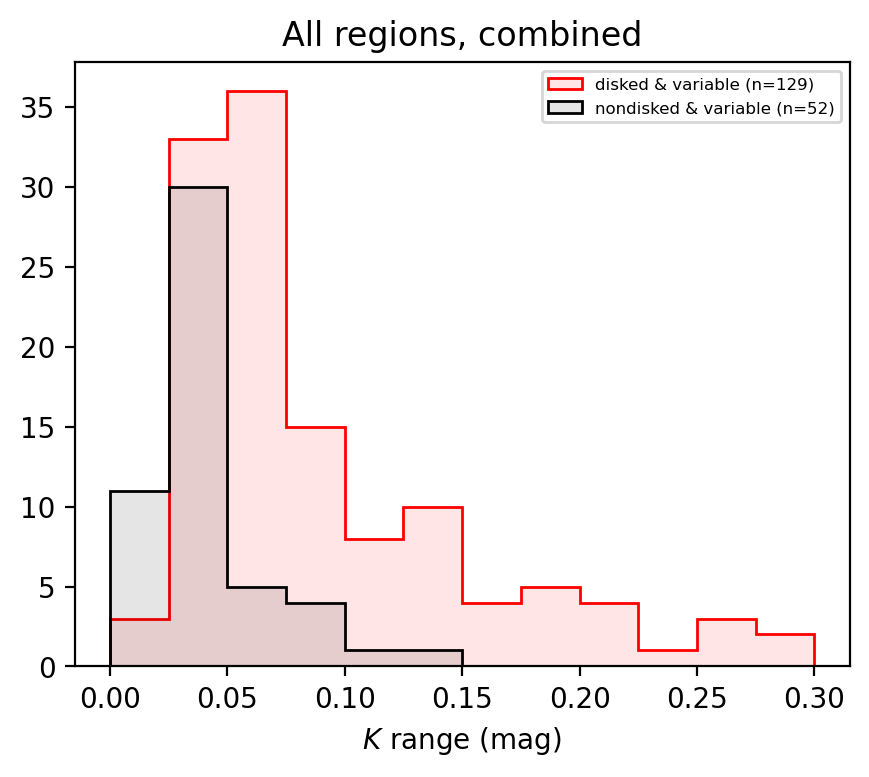

In [250]:
# now let's try combining.


# Ok, we want to make a pair of histograms. On the same figure.

# Histogram #1  (black, I think): variability amplitudes of non-disked statistical objects in each field. 
# No differentiation by spectral type.

fig = plt.figure(figsize=(5,4), dpi=200)
ax = fig.add_subplot(111)

black_sample = []
red_sample = []
    

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)
    
    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')    

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")
    print(f"disked: {np.sum(ref & disks)}")
    print(f"nondisked: {np.sum(ref & nondisks)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    disked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & disks])
    nondisked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & nondisks])
    
    n_disked_and_variable = np.sum(disked & (var_stat))
    n_nondisked_and_variable = np.sum(nondisked & (var_stat))
    
    histrange = [0, 0.3]
    n_bins = 12

    red_sample.extend(x_match.approved['range_KAPERMAG3'][disked & (var_stat)])
    
#     ax.hist(
#         x_match.approved['range_KAPERMAG3'][disked & (var_stat)], 
#         range=histrange,
#         bins=n_bins,
# #         color='r',
#         histtype='stepfilled',
#         ec='r',
#         fc=(1, 0, 0, 0.1),
#         label=f'disked & variable (n={n_disked_and_variable})',
        
#     )

    black_sample.extend(x_match.approved['range_KAPERMAG3'][nondisked & (var_stat)])
#     ax.hist(
#         x_match.approved['range_KAPERMAG3'][nondisked & (var_stat)], 
#         range=histrange,
#         bins=n_bins,
#         color='k',
#         histtype='stepfilled',
#         ec='k',
#         fc=(0,0,0, 0.1),
#         label=f'nondisked & variable (n={n_nondisked_and_variable})',
#     )

    
#     ax.invert_yaxis()

#     ax.set_xlim(4.25, 11.5)
#     ax.set_xlabel("Spectral Type")
#     ax.set_xlabel("$K$ range (mag)")

#     xticks = ax.get_xticks()
#     xticks_minor = np.arange(4.5, 12, 0.5)
#     ax.set_xticks(xticks_minor, minor=True)
#     new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
#     ax.set_xticklabels(new_xtick_labels)
    
#     ax.set_title(full_names[wserv])
#     plt.legend(fontsize=6, loc='upper right')
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")


# n_disked_and_variable = np.sum(disked & (var_stat))
# n_nondisked_and_variable = np.sum(nondisked & (var_stat))

n_disked_and_variable = len(red_sample)
n_nondisked_and_variable = len(black_sample)

ax.hist(
    red_sample, 
    range=histrange,
    bins=n_bins,
#         color='r',
    histtype='stepfilled',
    ec='r',
    fc=(1, 0, 0, 0.1),
    label=f'disked & variable (n={n_disked_and_variable})',

)

ax.hist(
    black_sample, 
    range=histrange,
    bins=n_bins,
    color='k',
    histtype='stepfilled',
    ec='k',
    fc=(0,0,0, 0.1),
    label=f'nondisked & variable (n={n_nondisked_and_variable})',
)

ax.set_title("All regions, combined")

ax.set_xlabel("$K$ range (mag)")
plt.legend(fontsize=6, loc='upper right')


WSERV5:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


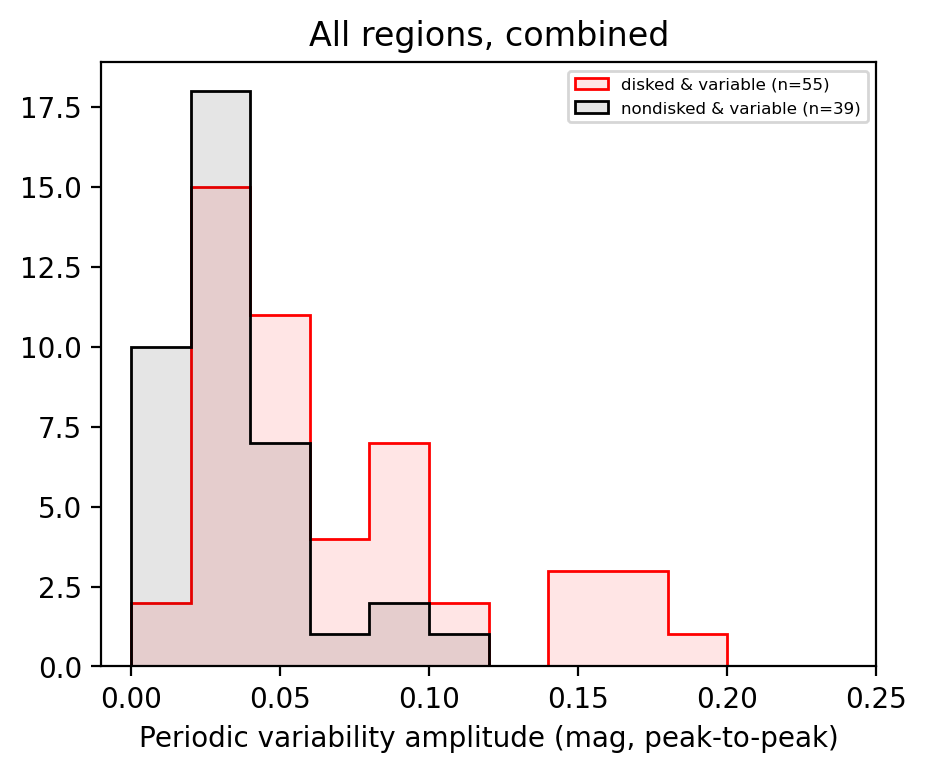

In [251]:
# now for periodic amplitudes, stacked

fig = plt.figure(figsize=(5,4), dpi=200)
ax = fig.add_subplot(111)

black_sample = []
red_sample = []

for wserv in [5, 7, 8]:
# for wserv in [5]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    

    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')
    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    per_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & disks])
    per_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & nondisks])
    
    per_stat_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & disks])
    per_stat_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & nondisks])
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    period_table_per_stat_disk = period_table.loc[x_match.approved['SOURCEID'][per_stat_disks]]
    period_table_per_stat_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_stat_nondisks]]

    period_table_per_disk = period_table.loc[x_match.approved['SOURCEID'][per_disks]]
    period_table_per_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_nondisks]]

    
    n_disked_and_variable = np.sum(per_stat_disks)
    n_nondisked_and_variable = np.sum(per_stat_nondisks)
    
    histrange = [0, 0.2]
    n_bins = 10
    
    
    
#     fig = plt.figure(figsize=(5,4), dpi=200)
#     ax = fig.add_subplot(111)


    
    red_sample.extend(period_table_per_stat_disk['Amp']*2)
    
#     ax.hist(
# #         x_match.approved['SpT'][per_disks], 
# #         x_match.approved['range_KAPERMAG3'][per_stat], 
#         period_table_per_stat_disk['Amp']*2,
# #         s=10, 
# #         linewidths=0.25,
#         range=histrange,
#         bins=n_bins,
# #         color='r',
#         histtype='stepfilled',
#         ec='r',
#         fc=(1, 0, 0, 0.1),
# #         ec='k',
#         label=f'disked & periodic (n={n_disked_and_variable})',
#     )

    black_sample.extend(period_table_per_stat_nondisk['Amp']*2)
#     ax.hist(
        
# #         x_match.approved['SpT'][per_nondisks], 
# #         x_match.approved['range_KAPERMAG3'][per_stat], 
#         period_table_per_stat_nondisk['Amp']*2,
#         range=histrange,
#         bins=n_bins,
#         color='k',
#         histtype='stepfilled',
#         ec='k',
#         fc=(0,0,0, 0.1),        
#         label=f'nondisked & periodic (n={n_nondisked_and_variable})',
#     )    
#     ax.invert_yaxis()

#     ax.set_xlim(4.25, 11.5)
#     ax.set_xlabel("Spectral Type")
#     ax.set_xlabel("Periodic variability amplitude (mag, peak-to-peak)")

#     xticks = ax.get_xticks()
#     xticks_minor = np.arange(4.5, 12, 0.5)
#     ax.set_xticks(xticks_minor, minor=True)
#     new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
#     ax.set_xticklabels(new_xtick_labels)
    
#     ax.set_xlim(None, 0.25)
    
#     ax.set_title(full_names[wserv])
#     plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")


n_disked_and_variable = len(red_sample)
n_nondisked_and_variable = len(black_sample)

histrange = [0, 0.2]
n_bins = 10

ax.hist(
    red_sample, 
    range=histrange,
    bins=n_bins,
#         color='r',
    histtype='stepfilled',
    ec='r',
    fc=(1, 0, 0, 0.1),
    label=f'disked & variable (n={n_disked_and_variable})',

)

ax.hist(
    black_sample, 
    range=histrange,
    bins=n_bins,
    color='k',
    histtype='stepfilled',
    ec='k',
    fc=(0,0,0, 0.1),
    label=f'nondisked & variable (n={n_nondisked_and_variable})',
)

ax.set_title("All regions, combined")
ax.set_xlim(None, 0.25)

ax.set_xlabel("Periodic variability amplitude (mag, peak-to-peak)")
plt.legend(fontsize=6, loc='upper right')


WSERV5:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


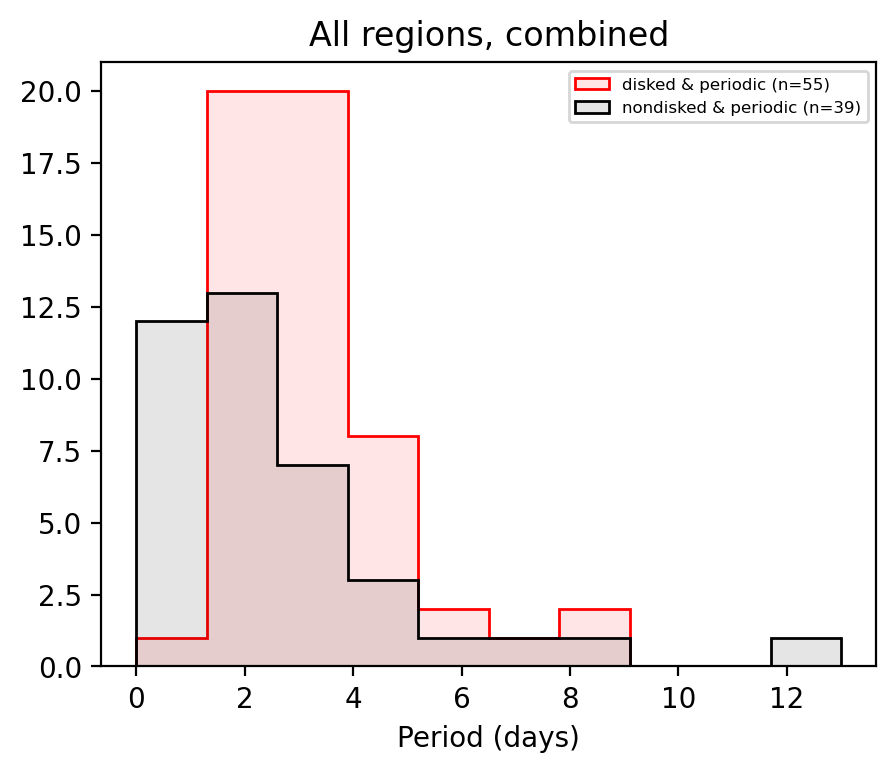

In [255]:

# just periods, stacked

fig = plt.figure(figsize=(5,4), dpi=200)
ax = fig.add_subplot(111)

black_sample = []
red_sample = []

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')
    
    
    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    per_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & disks])
    per_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & nondisks])
    per_stat_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & disks])
    per_stat_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & nondisks])    
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]

    period_table_per_disk = period_table.loc[x_match.approved['SOURCEID'][per_disks]]
    period_table_per_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_nondisks]]

    period_table_per_stat_disk = period_table.loc[x_match.approved['SOURCEID'][per_stat_disks]]
    period_table_per_stat_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_stat_nondisks]] 
    
    n_disked_and_variable = np.sum(per_stat_disks)
    n_nondisked_and_variable = np.sum(per_stat_nondisks)    
    
#     fig = plt.figure(figsize=(5,4), dpi=200)
#     ax = fig.add_subplot(111)


    
    
    red_sample.extend(period_table_per_stat_disk['Period'])
    black_sample.extend(period_table_per_stat_nondisk['Period'])

#     ax.hist(
        
# #         x_match.approved['SpT'][per_nondisks], 
# #         x_match.approved['range_KAPERMAG3'][per_stat], 
#         period_table_per_stat_nondisk['Period'],
#         range=histrange,
#         bins=n_bins,
#         color='k',
#         histtype='stepfilled',
#         ec='k',
#         fc=(0,0,0, 0.1),        
#         label=f'nondisked & periodic (n={n_nondisked_and_variable})',
#     )        
    
#     ax.scatter(
#         x_match.approved['SpT'][per_nondisks], 
# #         x_match.approved['range_KAPERMAG3'][per], 
#         period_table_per_nondisk['Period'],
#         s=8, 
#         linewidths=0.25,
#         marker='o',
#         c='k',
#         ec='k',
#         label='periodic, not disked'
#     )
#     ax.scatter(
#         x_match.approved['SpT'][per_disks], 
# #         x_match.approved['range_KAPERMAG3'][per_stat], 
#         period_table_per_disk['Period'],
#         s=15, 
#         linewidths=0.25,
#         c='r',
#         ec='k',
#         label='periodic, disked'
#     )
    
#     ax.invert_yaxis()

#     ax.set_xlim(4.25, 11.5)
#     ax.set_xlabel("Spectral Type")
    
#     ax.set_title(full_names[wserv])
#     plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")



histrange = [0, 13]
n_bins = 10    


n_disked_and_variable = len(red_sample)
n_nondisked_and_variable = len(black_sample)


ax.hist(
    red_sample,
    range=histrange,
    bins=n_bins,
#         color='r',
    histtype='stepfilled',
    ec='r',
    fc=(1, 0, 0, 0.1),
    label=f'disked & periodic (n={n_disked_and_variable})',
)
ax.hist(
    black_sample,
    range=histrange,
    bins=n_bins,
    color='k',
    histtype='stepfilled',
    ec='k',
    fc=(0,0,0, 0.1),        
    label=f'nondisked & periodic (n={n_nondisked_and_variable})',
)        

ax.set_xlabel("Period (days)")
ax.set_title("All regions, combined")
# ax.set_xlim(None, 0.25)

plt.legend(fontsize=6, loc='upper right')
